In [73]:
import numpy as np
from sympy import*
from scipy.integrate import solve_ivp
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [129]:
def L2_inner(f,g):
    return integrate.quad(lambda t: f(t)*g(t),0,oo)[0]


def e(n):
    a = np.zeros(n+1)
    a[n] = 1
    return lambda t : np.polynomial.laguerre.Laguerre(a)(t)* np.exp(-1/2*t)

def get_C(alpha,M):
    C = []
    for m in range(0,M+1):
        C.append(L2_inner(alpha,e(m)))
    
    return C

def plot_kernal(alpha, M,tspan):
    C = np.array(get_C(alpha,M))
    E = np.array([e(n)(tspan) for n in range(0,M+1)])
    approx = (C @ E)
    plt.plot(tspan,alpha(tspan),label=r"$\alpha(t)$")
    plt.plot(tspan,approx, label=r"$\hat{\alpha}(t)$")
    plt.ylabel("")
    plt.xlabel("t")

    plt.legend()
    plt.title(r"Erlang kernel $\alpha(t)$ and an approximation $\hat{\alpha}(t)$ with M=" + f"{M}")
    plt.grid()

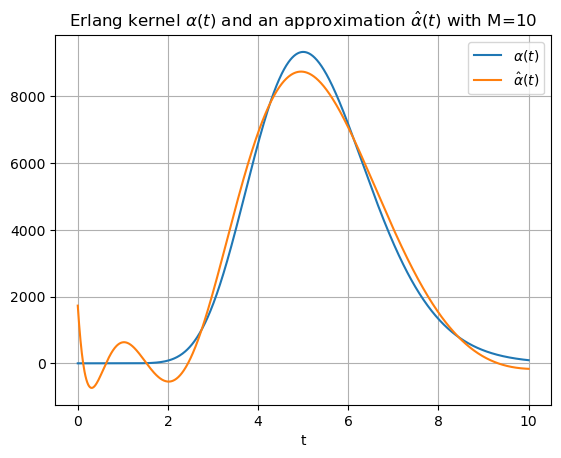

In [140]:
tspan = np.linspace(0,10,1000)
alpha = lambda t : t**15 * np.exp(-3*t)
M = 10
plot_kernal(alpha,M,tspan)

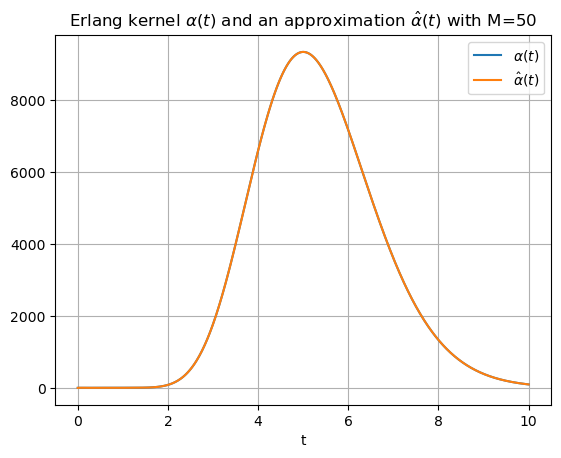

In [ ]:
M = 50
plot_kernal(alpha,M,tspan)

In [102]:
M = 100
a = 1/2
alpha = lambda t : t**4 * np.exp(-5*t)
C= get_C(alpha, M)

def f(x,z):
    return x-z

def ODE(t,y):
   # y[nx] = C @ y[nx +1:] # this defines z - might have to be moved to the bottom
    y[1] = C @ y[2:]
    ydot = np.zeros(M + 3)
    ydot[0] = f(y[0],y[1]) # y[nx] = z
    A = get_A(M,a)
    B = get_B(M)
    ydot[2:] =  A @ y[2:] + B * y[0] # Zdot = ydot[nx+1:] and Z = y[nx+1:], r(y) = r(x) = x[rj]
    return ydot

def get_B(m):
    B = np.ones(m+1)
    return B

def get_A(m,a):
    A = -(np.tri(m+1) - np.diag(np.ones(m+1)-a))
    return A


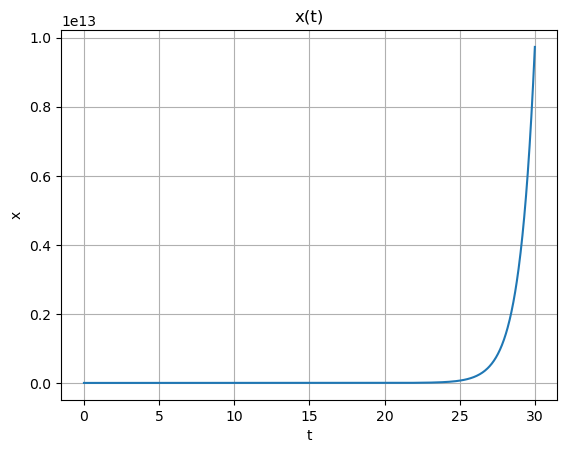

In [103]:
y0 = np.ones(M+3) # Initial conditions
t_span = (0.0, 30.0) # Simulation window

# Solve
solution = solve_ivp(
    fun=lambda t, y: ODE(t, y),
    t_span=t_span,
    y0=y0,
    method="RK45",   # ode45 equivalent
    rtol=1e-6,
    atol=1e-6
)

T = solution.t
Y = solution.y.T

# Plot
plt.plot(T,Y[:,0]) # Change the 0 to 1 to plot x2 instead.
plt.xlabel("t")
plt.ylabel("x")
plt.title("x(t)")
plt.grid(True)